In [71]:
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

df = pd.read_csv("IBM.csv")
df.set_index("Date", inplace=True)
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-03,7.291268,7.355003,7.291268,7.355003,1.641101,305955
1962-01-04,7.355003,7.355003,7.278521,7.281708,1.624746,274575
1962-01-05,7.272148,7.272148,7.125558,7.138305,1.592751,384405
1962-01-08,7.131931,7.131931,6.947100,7.004461,1.562885,572685
1962-01-09,7.036329,7.176546,7.036329,7.087317,1.581373,517770
1962-01-10,7.100064,7.131931,7.100064,7.100064,1.584218,313800
1962-01-11,7.119184,7.176546,7.119184,7.176546,1.601283,337335
1962-01-12,7.189293,7.240280,7.189293,7.189293,1.604128,462855
1962-01-15,7.214786,7.237094,7.214786,7.221160,1.611236,266730


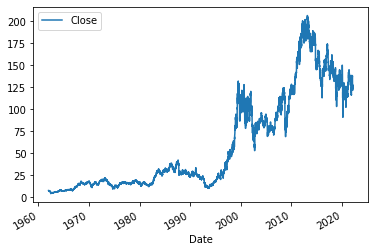

In [72]:
df.plot(y="Close")

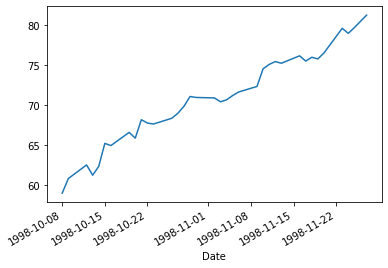

In [73]:
filtered_df = df[datetime(1998,10,8):datetime(1998,11,29)]["Close"]
filtered_df.plot()

In [74]:
filtered_df.describe()

count    36.000000
mean     70.812088
std       5.748080
min      59.034416
25%      67.407090
50%      70.954826
75%      75.481000
max      81.261948
Name: Close, dtype: float64

In [75]:
# there are NaNs in df after resample because stock market wasn't opened in days like Christmas, New Year's day, 9/11, etc.
filtered_df = filtered_df.resample("B").ffill()
filtered_df.describe()

count    37.000000
mean     71.052529
std       5.853348
min      59.034416
25%      67.668503
50%      70.984703
75%      75.525810
max      81.261948
Name: Close, dtype: float64

In [76]:
filtered_df.shape

(37,)

In [77]:
ncut = int(0.8 * filtered_df.shape[0])
ncut

29

In [78]:
train_data = filtered_df.iloc[:ncut]
test_data = filtered_df.iloc[ncut:]

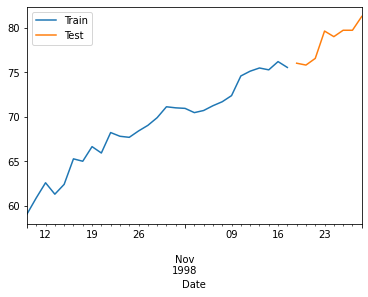

In [79]:
ax = train_data.plot()
test_data.plot(ax=ax)
ax.legend(["Train", "Test"])

In [80]:
fit_holt = Holt(train_data, initialization_method="estimated", exponential=True).fit()
fcast_holt = fit_holt.forecast(test_data.shape[0])

fit_ses = SimpleExpSmoothing(train_data, initialization_method="estimated").fit()
fcast_ses = fit_ses.forecast(test_data.shape[0])


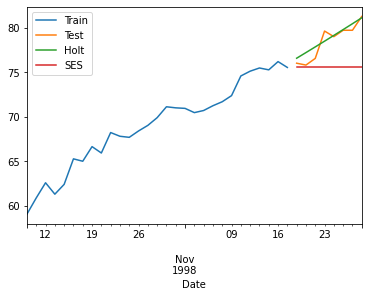

In [81]:
ax = train_data.plot()
test_data.plot(ax=ax)
fcast_holt.plot(ax=ax)
fcast_ses.plot(ax=ax)
ax.legend(["Train", "Test", "Holt", "SES"])



In [83]:
mse_holt =  mean_squared_error(test_data, fcast_holt)
mse_ses = mean_squared_error(test_data, fcast_ses)
print(f"Holt's MSE: {mse_holt} vs SES MSE: {mse_ses}")

Holt's MSE: 0.7308889845330764 vs SES MSE: 12.248369237952858
